In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [117]:
df = pd.read_csv('Walmart.csv')

In [118]:
# Loading the Walmart sales data from CSV file

df = pd.read_csv('Walmart.csv')


print("First 5 rows of our data:")
print(df.head())


print("\nOur dataset has:")
print(f"- {df.shape[0]} rows (each row = one week of sales data)")
print(f"- {df.shape[1]} columns (different information we have)")


First 5 rows of our data:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Our dataset has:
- 6435 rows (each row = one week of sales data)
- 8 columns (different information we have)


In [119]:
# Checking for missing data

print("Missing Values Check:\n")
print(df.isnull().sum())

# If all numbers are 0, that means no data is missing

# Checking the data types
print("\nData Types:\n")
print(df.dtypes)


Missing Values Check:

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Data Types:

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [120]:
#Changing the format of Date

df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)


df['Year'] = df['Date'].dt.year        # Extract year
df['Month'] = df['Date'].dt.month      # Extract month (1-12)
df['Week'] = df['Date'].dt.isocalendar().week  # Extract week number
df['Day'] = df['Date'].dt.day          # Extract day

print(df[['Date', 'Year', 'Month', 'Week', 'Day']].head())



        Date  Year  Month  Week  Day
0 2010-05-02  2010      5    17    2
1 2010-12-02  2010     12    48    2
2 2010-02-19  2010      2     7   19
3 2010-02-26  2010      2     8   26
4 2010-05-03  2010      5    18    3


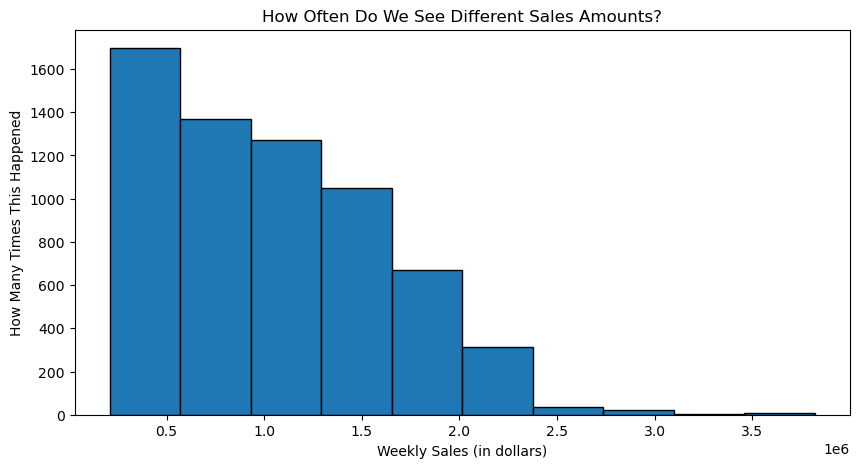

Average Weekly Sales: $1,046,964.88
Highest Weekly Sales: $3,818,686.45
Lowest Weekly Sales: $209,986.25


In [121]:
plt.figure(figsize=(10, 5))
plt.hist(df['Weekly_Sales'], edgecolor='black')
plt.xlabel('Weekly Sales (in dollars)')
plt.ylabel('How Many Times This Happened')
plt.title('How Often Do We See Different Sales Amounts?')
plt.show()

print(f"Average Weekly Sales: ${df['Weekly_Sales'].mean():,.2f}")
print(f"Highest Weekly Sales: ${df['Weekly_Sales'].max():,.2f}")
print(f"Lowest Weekly Sales: ${df['Weekly_Sales'].min():,.2f}")


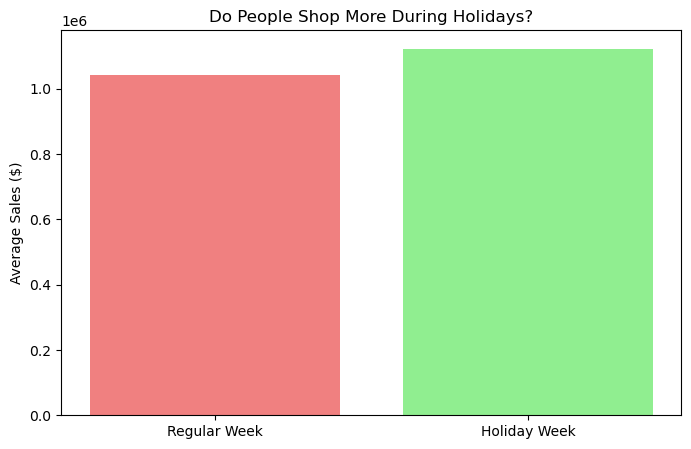


Regular Week Sales: $1,041,256.38
Holiday Week Sales: $1,122,887.89


In [122]:
# Checking how holidays effect sales
holiday_comparison = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(['Regular Week', 'Holiday Week'], 
               holiday_comparison.values, 
               color=['lightcoral', 'lightgreen'])
plt.ylabel('Average Sales ($)')
plt.title('Do People Shop More During Holidays?')
plt.show()

print(f"\nRegular Week Sales: ${holiday_comparison[0]:,.2f}")
print(f"Holiday Week Sales: ${holiday_comparison[1]:,.2f}")


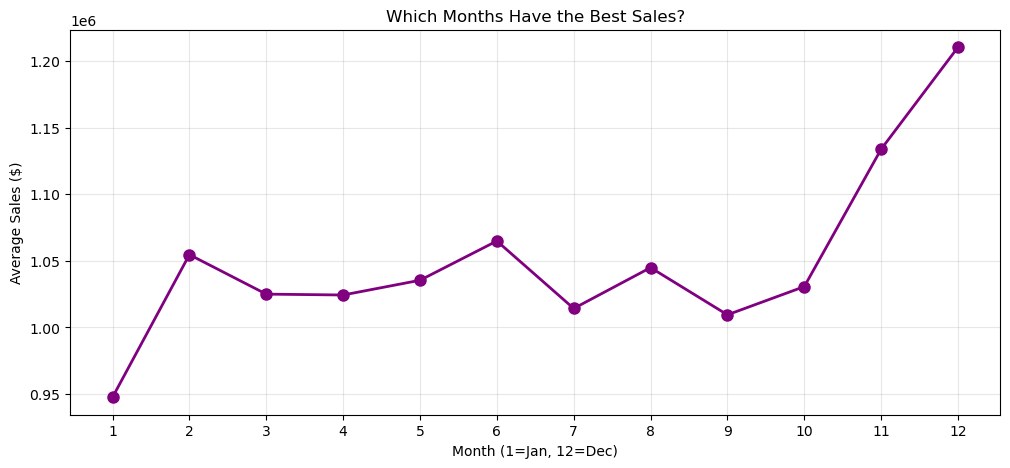

Best month for sales: December


In [123]:
# Checking months with the best sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, 
         marker='o', linewidth=2, markersize=8, color='purple')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Average Sales ($)')
plt.title('Which Months Have the Best Sales?')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.show()

best_month = monthly_sales.idxmax()
month_names = ['', 'January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
print(f"Best month for sales: {month_names[best_month]}")


In [124]:
# Machine Learning needs:
# X = Input features (the information we give to the model)
# y = Output target (what we want to predict)

# These are the features we'll use to predict sales
feature_columns = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 
                   'CPI', 'Unemployment', 'Month', 'Week']

X = df[feature_columns]  # Input: all the information we know
y = df['Weekly_Sales']   # Output: what we want to predict

print("Input Features (X):")
print(X.head())
print(f"\nShape: {X.shape[0]} rows, {X.shape[1]} features")

print("Target Variable (y) - What we want to predict:")
print(y.head())
print(f"\nShape: {y.shape[0]} values")


Input Features (X):
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0      1             0        42.31       2.572  211.096358         8.106   
1      1             1        38.51       2.548  211.242170         8.106   
2      1             0        39.93       2.514  211.289143         8.106   
3      1             0        46.63       2.561  211.319643         8.106   
4      1             0        46.50       2.625  211.350143         8.106   

   Month  Week  
0      5    17  
1     12    48  
2      2     7  
3      2     8  
4      5    18  

Shape: 6435 rows, 8 features
Target Variable (y) - What we want to predict:
0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

Shape: 6435 values


In [125]:
# Important concept: We split our data into two parts
# 1. Training Set (80%) - We use this to teach the model
# 2. Testing Set (20%) - We use this to check if the model learned correctly


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=40     # This makes results reproducible
)

print("Data Split Complete\n")

print(f"Training Set: {X_train.shape[0]} samples ")
print(f"Testing Set:  {X_test.shape[0]} samples ")



Data Split Complete

Training Set: 5148 samples 
Testing Set:  1287 samples 


USING LINEAR REGRESSION ALGORITHM

In [126]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Create the model
model = LinearRegression()

# Step 2: Train the model (teach it using training data)
model.fit(X_train, y_train)

# Step 3: Make predictions on test data
y_pred = model.predict(X_test)



In [127]:
# We need to measure how accurate our predictions are
# Two important metrics:

# 1. MAE (Mean Absolute Error) - Average mistake in dollars
#    Lower is better! If MAE = $10,000, we're off by $10k on average

mae = mean_absolute_error(y_test, y_pred)

# 2. R² Score - How much of the pattern did we catch? (0 to 1)
#    Higher is better! 1.0 = perfect, 0.5 = caught half the pattern

r2 = r2_score(y_test, y_pred)


print("MODEL PERFORMANCE REPORT")
print(f"\n1. Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"   → On average, our predictions are off by ${mae:,.2f}")

print(f"\n2. R² Score: {r2:.4f} (out of 1.0)")
print(f"   → We captured {r2*100:.2f}% of the sales pattern")


MODEL PERFORMANCE REPORT

1. Mean Absolute Error (MAE): $428,543.37
   → On average, our predictions are off by $428,543.37

2. R² Score: 0.1116 (out of 1.0)
   → We captured 11.16% of the sales pattern


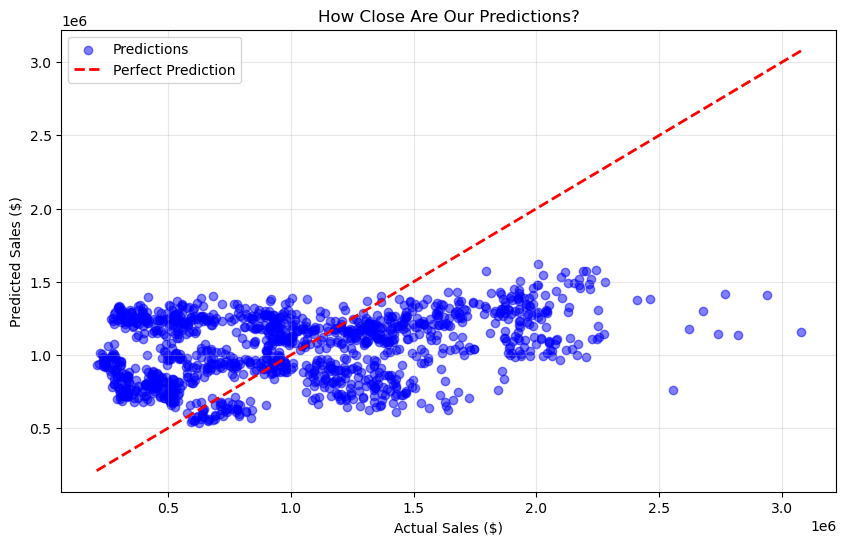

In [108]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')

# Add a red line showing where perfect predictions would be
perfect_line = [y_test.min(), y_test.max()]
plt.plot(perfect_line, perfect_line, 'r--', linewidth=2, label='Perfect Prediction')

# Scatter Plot
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.title('How Close Are Our Predictions?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [111]:

# Create a comparison table
comparison = pd.DataFrame({
    'Actual Sales': y_test.values[:10],
    'Predicted Sales': y_pred[:10],
    'Difference': y_test.values[:10] - y_pred[:10]
})

# Calculate error percentage
comparison['Error %'] = (abs(comparison['Difference']) / comparison['Actual Sales'] * 100)

print("First 10 Predictions:\n")

print(comparison.to_string(index=False))


# Show average error
avg_error_pct = comparison['Error %'].mean()
print(f"\nAverage Error: {avg_error_pct:.2f}%")




First 10 Predictions:

 Actual Sales  Predicted Sales    Difference    Error %
    448998.73     1.182340e+06 -7.333412e+05 163.328131
    964169.67     1.281716e+06 -3.175466e+05  32.934721
    563884.47     1.216120e+06 -6.522353e+05 115.668242
   2766400.05     1.419857e+06  1.346543e+06  48.674921
    302423.93     9.568666e+05 -6.544427e+05 216.399102
   1872365.99     1.290054e+06  5.823117e+05  31.100311
   1330757.22     1.214124e+06  1.166330e+05   8.764409
    871264.25     1.309956e+06 -4.386917e+05  50.351163
    287033.64     9.760378e+05 -6.890042e+05 240.043003
    283455.13     8.934934e+05 -6.100383e+05 215.215118

Average Error: 112.25%


USING RANDOM FOREST ALGORITHM

In [71]:


from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(
    n_estimators=100,    # Use 100 decision trees
    random_state=42,     # For reproducible results
    n_jobs=-1           # Use all computer cores for speed
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



In [91]:
# Calculate metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create comparison

print("MODEL COMPARISON")

print(f"\n{'Model':<20} {'Average Error':<20} {'R² Score':<20} {'Accuracy'}")

print(f"{'Linear Regression':<20} ${mae:>11,.2f} {r2:>14.4f} {r2*100:>19.2f}%")
print(f"{'Random Forest':<20} ${mae_rf:>11,.2f} {r2_rf:>14.4f} {r2_rf*100:>19.2f}%")


MODEL COMPARISON

Model                Average Error        R² Score             Accuracy
Linear Regression    $ 428,543.37         0.1116               11.16%
Random Forest        $  66,757.63         0.9541               95.41%


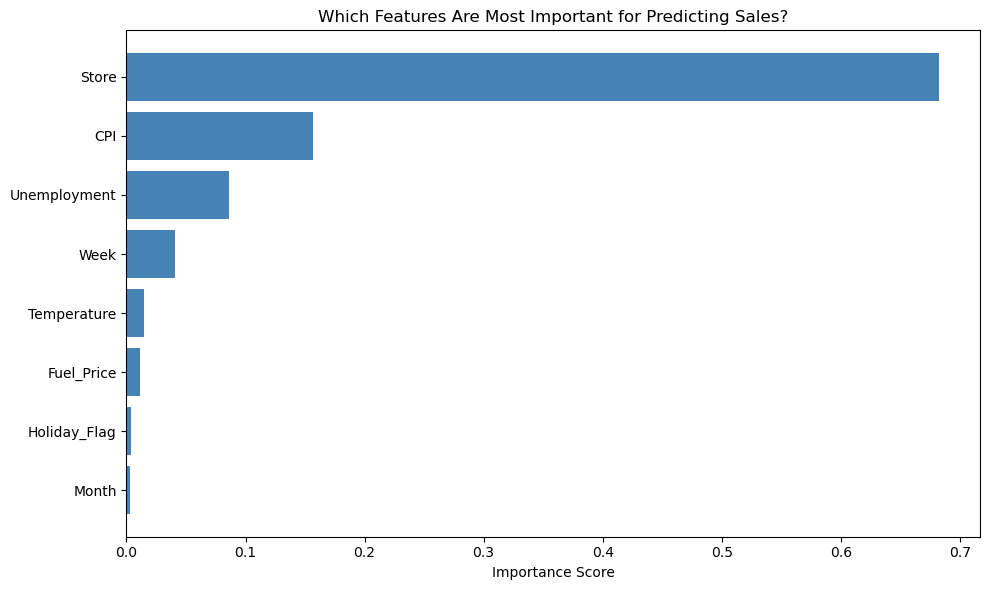

In [76]:


# Feature Plot
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)


# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Which Features Are Most Important for Predicting Sales?')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



DATA PREDICTION

In [78]:
new_data = pd.DataFrame({
    'Store': [1],
    'Holiday_Flag': [0],        # Not a holiday
    'Temperature': [65.0],      # 65 degrees
    'Fuel_Price': [3.0],        # $3 per gallon
    'CPI': [215.0],            # CPI value
    'Unemployment': [7.5],      # 7.5% unemployment
    'Month': [12],              # December
    'Week': [50]                # Week 50 of the year
})

# Make prediction using our best model (Random Forest)
prediction = rf_model.predict(new_data)


print("NEW PREDICTION EXAMPLE")
print("\nInput Conditions:")
print(f"  Store: {new_data['Store'].values[0]}")
print(f"  Holiday: {'Yes' if new_data['Holiday_Flag'].values[0] == 1 else 'No'}")
print(f"  Temperature: {new_data['Temperature'].values[0]}°F")
print(f"  Fuel Price: ${new_data['Fuel_Price'].values[0]:.2f}/gallon")
print(f"  Month: {new_data['Month'].values[0]} (December)")
print(f"  Week: {new_data['Week'].values[0]}")

print(f"\n PREDICTED WEEKLY SALES: ${prediction[0]:,.2f}")



NEW PREDICTION EXAMPLE

Input Conditions:
  Store: 1
  Holiday: No
  Temperature: 65.0°F
  Fuel Price: $3.00/gallon
  Month: 12 (December)
  Week: 50

 PREDICTED WEEKLY SALES: $1,735,018.62
